#10 Academy July 2020 Training  Week 1  Challenge.
Topic: 
African influencers: Twitter users segmentation  
Goal: 
Identify influencers rank position from Twitter data. 


#Part 1:
Webscrapping with python 

In [ ]:
#Installing the required modules.
#Request is for performing HTTP requests and BeautifulSoup4 is for handling the HTML processing.
!pip install requests BeautifulSoup4 fire  

In [ ]:
#importing modules
from __future__ import unicode_literals
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
import pandas as pd
import os, sys

import fire

In [ ]:
#%%writefile ../pyscrap_url.py

def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content  #.encode(BeautifulSoup.original_encoding)
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)
    
def get_elements(url, tag='',search={}, fname=None):
    """
    Downloads a page specified by the url parameter
    and returns a list of strings, one per tag element
    """
    
    if isinstance(url,str):
        response = simple_get(url)
    else:
        #if already it is a loaded html page
        response = url

    if response is not None:
        html = BeautifulSoup(response, 'html.parser')
        
        res = []
        if tag:    
            for li in html.select(tag):
                for name in li.text.split('\n'):
                    if len(name) > 0:
                        res.append(name.strip())
                       
                
        if search:
            soup = html            
            
            
            r = ''
            if 'find' in search.keys():
                print('finding',search['find'])
                soup = soup.find(**search['find'])
                r = soup

                
            if 'find_all' in search.keys():
                print('finding all of',search['find_all'])
                r = soup.find_all(**search['find_all'])
   
            if r:
                for x in list(r):
                    if len(x) > 0:
                        res.extend(x)
            
        return res

    # Raise an exception if we failed to get any data from the url
    raise Exception('Error retrieving contents at {}'.format(url))    
    
    
if get_ipython().__class__.__name__ == '__main__':
    fire(get_elements)

Scraping the [The 100 most Influential Twitter users website
](https://africafreak.com/100-most-influential-twitter-users-in-africa) to obtain the users twitter handle.


In [ ]:
ress = get_elements('https://africafreak.com/100-most-influential-twitter-users-in-africa',tag='h2')
ress

new = pd.DataFrame(ress).head(100) #creating a datarame
new
#Data manipulation
df1 = new[0].str.split('.', expand=True)
df1.head(100)

df2 = df1[1].str.split('(', expand=True)
df2.head(100)

df2[1] = df2[1].str.strip(')')
df2.head(100)

df2.columns = ['Twitter_name','Twitter_handle']
df2


Influencer_handle = df2['Twitter_handle']
Influencer_handle

Influencer_handle = df2['Twitter_handle'].astype(str).to_list()
Influencer_handle

reversed_list = Influencer_handle[::-1]
reversed_list

reversed_list.pop(2)  #removing None.
reversed_list

Top_influencers = reversed_list
Top_influencers


['@Trevornoah',
 '@GarethCliff',
 '@News24',
 '@Julius_S_Malema',
 '@helenzille',
 '@mailandguardian',
 '@5FM',
 '@loyisogola',
 '@Computicket',
 '@MTVbaseAfrica',
 '@OfficialCSA',
 '@702JohnRobbie',
 '@UlrichJvV',
 '@euphonik',
 '@BBCAndrewH',
 '@Camfed',
 '@BobSkinstad',
 '@SamsungSA',
 '@liveamp',
 '@hartleyr',
 '@SmithInAfrica',
 '@gertjohan',
 '@_AfricanUnion',
 '@SandtonCity',
 '@ParliamentofRSA',
 '@Mo_IbrahimFdn',
 '@NDOCKenya',
 '@PeterGreste',
 '@JendayiFrazer',
 '@art2gee',
 '@IECSouthAfrica',
 '@forbesafrica',
 '@Entrepreneur_SA',
 '@geoffreyyork',
 '@The_New_Age',
 '@HenleyAfrica',
 '@IFCAfrica',
 '@africaprogress',
 '@MbuyiseniNdlozi',
 '@FoodBlogCT',
 '@AfricaResearch',
 '@MadeItInAfrica',
 '@cnbcafrica',
 '@willintune',
 '@AfricaGoodNews',
 '@ThinkAfricaFeed',
 '@CityofJoburgZA',
 '@theafricareport',
 '@Afrinnovator',
 '@schneiderhome',
 '@TheStar_news',
 '@rangerdiaries',
 '@daniel_howden',
 '@Aynte',
 '@GautengProvince',
 '@TechCentral',
 '@africamedia_CPJ',
 '@saveth

Scrapping the [The website of top government officials responding to Coronavirus in East Africa](https://www.atlanticcouncil.org/blogs/africasource/african-leaders-respond-to-coronavirus-on-twitter/#east-africa) and obtain their twitter handles.

In [ ]:
#Obtaining the url
### Category = East Africa.
url= 'https://www.atlanticcouncil.org/blogs/africasource/african-leaders-respond-to-coronavirus-on-twitter/#east-africa'
response = simple_get(url)

res = get_elements(response, search={'find_all':{'class_':'twitter-tweet'}})
res
#Obtaining the specific strings with the twitter name and handle.
my_stringtags = []
for tag in res:
  if tag.string != None:
    my_stringtags.append(tag.string)
my_stringtags

#Extracting the specific twitter handles.
import re
handleregex = re.compile(r'@[a-zA-Z0-9_]{0,15}')
tags = ''.join(my_stringtags)
govt_official = handleregex.findall(tags)
govt_handle = pd.DataFrame(govt_official)
govt_handle

##Data manipulation
#govt_handle[0] = govt_handle[0].str.strip('@')
#govt_handle.head(100)

govt_handle.columns = ['Twitter_handle']
govt_handle

Top_officials = govt_handle['Twitter_handle'].astype(str).to_list()
Top_officials


finding all of {'class_': 'twitter-tweet'}


['@EswatiniGovern1',
 '@MalawiGovt',
 '@hagegeingob',
 '@FinanceSC',
 '@PresidencyZA',
 '@mohzambia',
 '@edmnangagwa',
 '@MinSantedj',
 '@hawelti',
 '@StateHouseKenya',
 '@PaulKagame',
 '@M_Farmaajo',
 '@SouthSudanGov',
 '@SudanPMHamdok',
 '@TZSpokesperson',
 '@KagutaMuseveni',
 '@angola_Mirex',
 '@willynyamitwe',
 '@Cherif_MZ',
 '@Presidence_RDC',
 '@PresidentABO',
 '@PresidenceBenin',
 '@rochkaborepf',
 '@PresidenciaCV',
 '@AOuattara_PRCI',
 '@Presidency_GMB',
 '@NAkufoAddo',
 '@President_GN',
 '@USEmbalo',
 '@PresidenceMali',
 '@CheikhGhazouani',
 '@IssoufouMhm',
 '@MBuhari',
 '@Macky_Sall',
 '@PresidentBio',
 '@MSPS_Togo']

Searching and dowloading the data based on the twitter handles
Top government officials.

In [ ]:
#Importing necessary modules
from __future__ import unicode_literals
import sys
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import matplotlib.dates as mdates
import seaborn as sns
sns.set()


# to view all columns
pd.set_option("display.max.columns", None)


'''
def print_full(x):
     # This is to print nicely DataFrame wide tables
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display')'
'''

#Import the necessary methods from tweepy library  

#install tweepy if you don't have it
!pip install tweepy
import json
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#sentiment analysis package
!pip install textblob
from textblob import TextBlob

#general text pre-processor
!pip install nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

#tweet pre-processor 
!pip install tweet-preprocessor
import preprocessor as p

class tweetsearch():
    def __init__(self, cols=None, auth=None):
        if not cols is None:
            self.cols = cols
        else:
            self.cols = [
                'id', 'created_at', 'source', 'original_text', 'clean_text',
                'sentiment', 'polarity', 'subjectivity','lang','favorite_count',
                'retweet_count','original_author', 'hashtags','user_mentions',
                'followers', 'following', 'place_coordinates', 'place'
            ]
        if auth is None:
            consumer_key = 'Secret'
            consumer_secret = 'Secret'
            access_token = 'Secret-'
            access_token_secret = 'Secret'
            # This handles Twitter authentication
            auth = OAuthHandler(consumer_key, consumer_secret)
            auth.set_access_token(access_token, access_token_secret)
        self.auth = auth
        self.api = tweepy.API(auth, wait_on_rate_limit=True)
        self.filtered_tweet = ''
    def clean_tweets(self, twitter_text):
        # use pre processor
        tweet = p.clean(twitter_text)
        #Happy Emoticons
        emoticons_happy = set([
            ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
            ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
            '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
            'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
            '<3'
            ])
        # Sad Emoticons
        emoticons_sad = set([
            ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
            ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
            ':c', ':{', '>:\\', ';('
            ])
        #Emoji patterns
        emoji_pattern = re.compile("["
                 u"\U0001F600-\U0001F64F"  # emoticons
                 u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                 u"\U0001F680-\U0001F6FF"  # transport & map symbols
                 u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                 u"\U00002702-\U000027B0"
                 u"\U000024C2-\U0001F251"
                 "]+", flags=re.UNICODE)
        # combine sad and happy emoticons
        emoticons = emoticons_happy.union(emoticons_sad)
        stop_words = set(stopwords.words('english'))
        word_tokens = nltk.word_tokenize(tweet)
        tweet = re.sub(r':', '', tweet)
        tweet = re.sub(r'‚Ä¶', '', tweet)
        #replace consecutive non-ASCII characters with a space
        tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
        #remove emojis from tweet
        tweet = emoji_pattern.sub(r'', tweet)
        #filter using NLTK library append it to a string
        filtered_tweet = [w for w in word_tokens if not w in stop_words]
        # looping through conditions
        filtered_tweet = []
        for w in word_tokens:
            # check tokens againts stop words, emoticons and punctuations
            if w not in stop_words and w not in emoticons and w not in string.punctuation:
                filtered_tweet.append(w)
        return ' '.join(filtered_tweet)
    def get_tweets(self, name, csvfile=None):
        df = pd.DataFrame(columns=self.cols)
        if not csvfile is None:
            # If the file exists, then read the existing data from the CSV file
            if os.path.exists(csvfile):
                df = pd.read_csv(csvfile, header=0)
        # page attribute in tweepy.cursor and iteration
        for page in tweepy.Cursor(self.api.user_timeline, id=name).pages(1):
            for status in page:
                new_entry = []
                status = status._json
                # filter by language
                #if status['lang'] != 'en':
                 #   continue
                # if this tweet is a retweet update retweet count
                if status['created_at'] in df['created_at'].values:
                    i = df.loc[df['created_at'] == status['created_at']].index[0]
                    cond1 = status['favorite_count'] != df.at[i, 'favorite_count']
                    cond2 = status['retweet_count'] != df.at[i, 'retweet_count']
                    if cond1 or cond2:
                        df.at[i, 'favorite_count'] = status['favorite_count']
                        df.at[i, 'retweet_count'] = status['retweet_count']
                    continue
                # calculate sentiment
                filtered_tweet = self.clean_tweets(status['text'])
                blob = TextBlob(filtered_tweet)
                Sentiment = blob.sentiment
                polarity = Sentiment.polarity
                subjectivity = Sentiment.subjectivity
                new_entry += [status['id'], status['created_at'],
                              status['source'], status['text'], filtered_tweet,
                              Sentiment, polarity, subjectivity, status['lang'],
                              status['favorite_count'], status['retweet_count']]
                new_entry.append(status['user']['screen_name'])
                hashtags = ", ".join([hashtag_item['text'] for hashtag_item in status['entities']['hashtags']])
                new_entry.append(hashtags) # append the hashtags
                mentions = ", ".join([mention['screen_name'] for mention in status['entities']['user_mentions']])
                new_entry.append(mentions) # append user mentions
                try:
                    followers = status['user']['followers_count']
                except TypeError:
                    followers = None
                new_entry.append(followers)
                try:
                    following = status['user']['friends_count']
                except TypeError:
                    following = None
                new_entry.append(following)
                try:
                    xyz = status['place']['bounding_box']['coordinates']
                    coordinates = [coord for loc in xyz for coord in loc]
                except TypeError:
                    coordinates = None
                new_entry.append(coordinates)
                try:
                    location = status['user']['location']
                except TypeError:
                    location = ''
                new_entry.append(location)
                # appending a row to the data frame
                single_user_df = pd.DataFrame([new_entry], columns=self.cols)
                df = df.append(single_user_df, ignore_index=True)
        if not csvfile is None:
            df.to_csv(csvfile, columns=self.cols, index=False, encoding="utf-8")
        return df

Extracting the Government officials data.

In [ ]:
##Extracting the Top Influencers Tweets.
tweetsfile = "African__official1s.json"

ts = tweetsearch()

for handle in Top_officials:
  df = ts.get_tweets(handle, csvfile=tweetsfile)

In [ ]:
#Obtaining the dimension of the officials dataframe
df.shape


(703, 18)

In [ ]:
#Saving file
df.to_csv('Govt_officials Twitter Tweets_Finalx1.csv',index=False)


#from google.colab import files
#files.download("Govt_officials Twitter Tweets_Finalx1.csv.csv")

In [ ]:
Officials_data = pd.read_csv("Govt_officials Twitter Tweets_Finalx1.csv")
Officials_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 703 non-null    int64  
 1   created_at         703 non-null    object 
 2   source             703 non-null    object 
 3   original_text      703 non-null    object 
 4   clean_text         633 non-null    object 
 5   sentiment          703 non-null    object 
 6   polarity           703 non-null    float64
 7   subjectivity       703 non-null    float64
 8   lang               703 non-null    object 
 9   favorite_count     703 non-null    int64  
 10  retweet_count      703 non-null    int64  
 11  original_author    703 non-null    object 
 12  hashtags           182 non-null    object 
 13  user_mentions      147 non-null    object 
 14  followers          703 non-null    int64  
 15  following          703 non-null    int64  
 16  place_coordinates  17 non-

In [ ]:
##Summary statistics  of officials dataframe.
Officials_data.describe()

,id,polarity,subjectivity,favorite_count,retweet_count,followers,following
count,7.030000e+02,703.000000,703.000000,703.000000,703.000000,7.030000e+02,703.000000
mean,1.269837e+18,0.050897,0.158544,681.886202,145.807966,4.505639e+05,294.957326
std,4.408504e+16,0.186727,0.284526,1646.196507,445.725659,7.461659e+05,780.037744
min,8.513641e+17,-1.000000,0.000000,0.000000,0.000000,1.260000e+02,0.000000
25%,1.270977e+18,0.000000,0.000000,7.000000,5.000000,7.159000e+03,26.000000
50%,1.280905e+18,0.000000,0.000000,100.000000,29.000000,6.621400e+04,115.000000
75%,1.283353e+18,0.000000,0.250000,530.000000,95.500000,4.242700e+05,214.000000
max,1.284815e+18,1.000000,1.000000,16332.000000,6298.000000,3.271668e+06,4656.000000


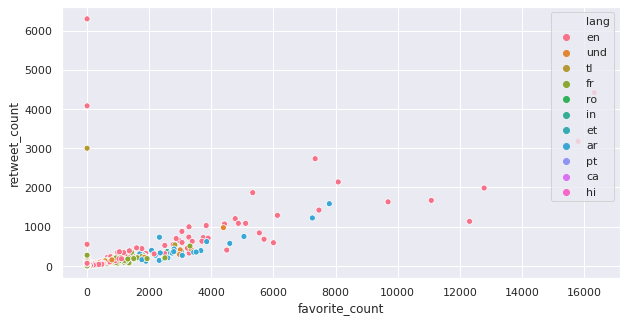

In [ ]:
##Datatframe visualizations of Officials dataset
fig= plt.figure(figsize=(10,5))
sns.scatterplot(x = "favorite_count",y = "retweet_count",hue='lang',data=Officials_data)
plt.show()

Top African Government Officials popularity score:

In [ ]:
###Popularity score
#Parameters of interest = No of retweets, Favorite count.
Popular_score_official = Officials_data[['original_author','favorite_count','retweet_count']]
Popular_score_official = Popular_score_official.groupby('original_author').sum()

#Creating Popular Score.
Popular_score = Popular_score_official['favorite_count'] + Popular_score_official['retweet_count']
Popular_score_official['Popular_score'] = Popular_score

Popular_score_official=Popular_score_official.sort_values("Popular_score",ascending=False)
Popular_score_official = Popular_score_official.reset_index()
Popular_score_official


,original_author,favorite_count,retweet_count,Popular_score
0,PaulKagame,104413,21715,126128
1,MBuhari,48493,10638,59131
2,CheikhGhazouani,50465,5779,56244
3,NAkufoAddo,42936,5986,48922
4,SudanPMHamdok,42000,6717,48717
5,M_Farmaajo,34261,5853,40114
6,edmnangagwa,31036,7211,38247
7,KagutaMuseveni,19555,2684,22239
8,Presidence_RDC,17492,2750,20242
9,Macky_Sall,13873,2884,16757


In [ ]:
##Checking for missingness.
Popular_score_official.isnull().sum()

##Summary of the officials dataframe.
Popular_score_official.describe()

,favorite_count,retweet_count,Popular_score
count,36.000000,36.000000,36.000000
mean,13315.722222,2847.305556,16163.027778
std,21793.449618,4576.536150,25756.502657
min,12.000000,1.000000,13.000000
25%,460.000000,237.000000,776.250000
50%,3480.500000,830.000000,4797.500000
75%,14777.750000,2852.500000,17628.250000
max,104413.000000,21715.000000,126128.000000


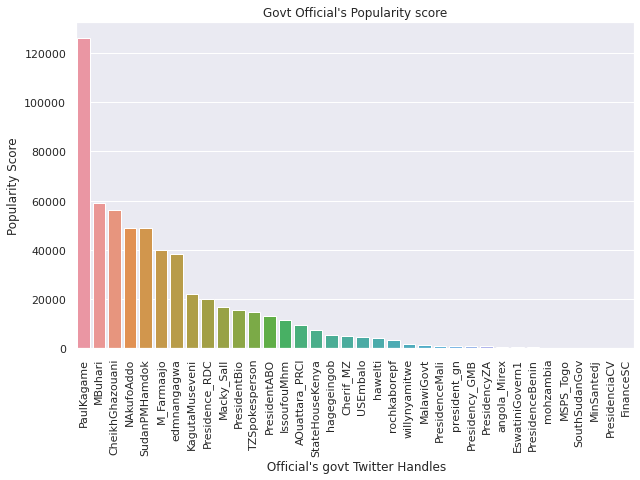

In [ ]:
##Barplot.
import matplotlib.pyplot as plt
%matplotlib inline

##Barplot
fig= plt.figure(figsize=(10,6))
sns.barplot(x="original_author",y="Popular_score",data=Popular_score_official)
plt.xticks(rotation = 90)
plt.xlabel(" Official's govt Twitter Handles")
plt.ylabel("Popularity Score")
plt.title("Govt Official's Popularity score")
plt.show()

Top African Government Official's Reach score:




In [ ]:
###Reach score
#Parameters of interest = No of retweets, Favorite count.
Reach_score_official = Officials_data[['original_author','followers','following']]

#Checking for missingness.
#Reach_score_official.isnull().sum()
#len(Reach_score_official['followers'].unique())

Reach_score_official = Reach_score_official.drop_duplicates('original_author')
#Creating Popular Score.
Reach_score = Reach_score_official['followers'] + Reach_score_official['following']
Reach_score_official['Reach_score'] = Reach_score

Reach_score_official = Reach_score_official.sort_values("Reach_score",ascending=False)
Reach_score_official.reset_index(drop=True)


,original_author,followers,following,Reach_score
0,MBuhari,3271668,26,3271694
1,PaulKagame,1983838,181,1984019
2,KagutaMuseveni,1813175,28,1813203
3,PresidencyZA,1599077,14,1599091
4,NAkufoAddo,1507937,352,1508289
5,Macky_Sall,1375382,171,1375553
6,StateHouseKenya,1103859,214,1104073
7,AOuattara_PRCI,832469,23,832492
8,edmnangagwa,546379,116,546495
9,M_Farmaajo,424270,2,424272


In [ ]:
##Summary statistics
Reach_score_official.describe()


,followers,following,Reach_score
count,3.600000e+01,36.000000,3.600000e+01
mean,4.583652e+05,290.055556,4.586552e+05
std,7.549618e+05,781.920893,7.548762e+05
min,1.260000e+02,0.000000,3.500000e+02
25%,8.149750e+03,26.000000,8.309250e+03
50%,8.680100e+04,105.000000,8.934650e+04
75%,4.547972e+05,200.500000,4.548278e+05
max,3.271668e+06,4656.000000,3.271694e+06


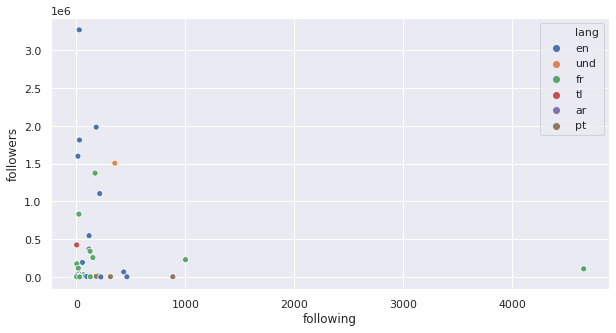

In [ ]:
##Data Visualization of the Reach score.
fig= plt.figure(figsize=(10,5))
sns.scatterplot(x = "following",y = "followers",hue='lang',data=Reach_score_official)
plt.show()

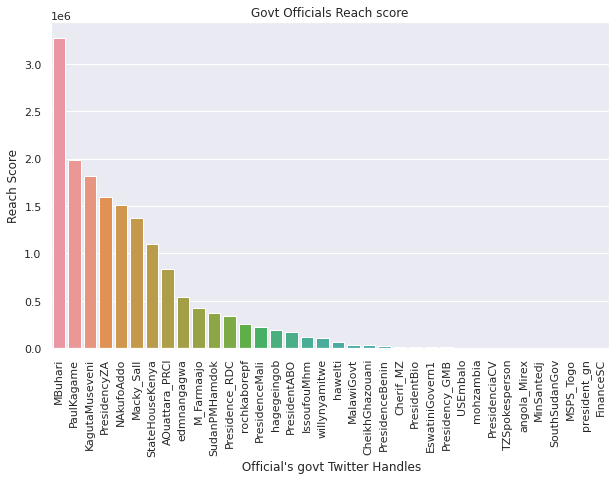

In [ ]:
##Barplot
fig= plt.figure(figsize=(10,6))
sns.barplot(x="original_author",y="Reach_score",data=Reach_score_official)
plt.xticks(rotation = 90)
plt.xlabel(" Official's govt Twitter Handles")
plt.ylabel("Reach Score")
plt.title("Govt Officials Reach score")
plt.show()

Top African Government Official's Relevance score:


In [ ]:
###Reach score
#Parameters of interest = No of retweets, Favorite count.
#Creating a dataframe with 
Relevance_score_official= Officials_data[['original_author','user_mentions']]

#Checking for missingness.
Relevance_score_official.isnull().sum()  #User_mentions has 545 missing values.

Relevance_score_official = Relevance_score_official.groupby('original_author').count()
Relevance_score_official=Relevance_score_official.sort_values("user_mentions",ascending=False)
Relevance_score_official =Relevance_score_official.reset_index()
Relevance_score_official

,original_author,user_mentions
0,willynyamitwe,14
1,USEmbalo,12
2,MalawiGovt,11
3,NAkufoAddo,10
4,TZSpokesperson,10
5,rochkaborepf,9
6,PresidenceBenin,9
7,president_gn,8
8,PaulKagame,8
9,Presidency_GMB,7


In [ ]:
#Summary
Relevance_score_official.describe()

,user_mentions
count,36.000000
mean,4.027778
std,4.017719
min,0.000000
25%,1.000000
50%,3.000000
75%,7.250000
max,14.000000


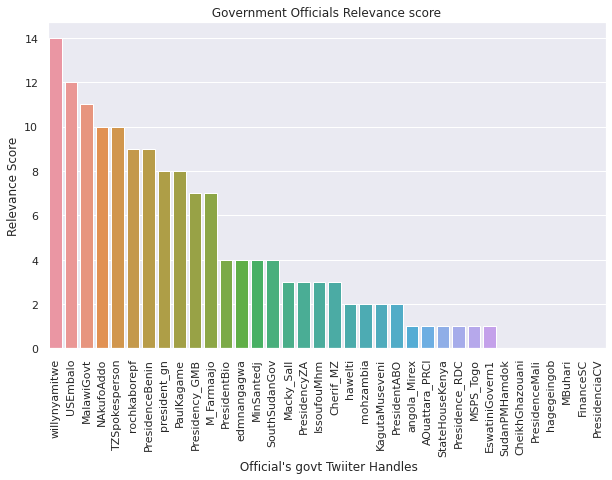

In [ ]:
##Barplot
fig= plt.figure(figsize=(10,6))
sns.barplot(x="original_author",y="user_mentions",data=Relevance_score_official)
plt.xticks(rotation = 90)
plt.xlabel(" Official's govt Twiiter Handles")
plt.ylabel("Relevance Score")
plt.title(" Government Officials Relevance score ")
plt.show()

 Top 5 unique hashtags used by Top Govt officials

In [ ]:
Officials_data.dropna(subset=["hashtags"],inplace=True)

In [ ]:
Officials_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 675
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 182 non-null    int64  
 1   created_at         182 non-null    object 
 2   source             182 non-null    object 
 3   original_text      182 non-null    object 
 4   clean_text         161 non-null    object 
 5   sentiment          182 non-null    object 
 6   polarity           182 non-null    float64
 7   subjectivity       182 non-null    float64
 8   lang               182 non-null    object 
 9   favorite_count     182 non-null    int64  
 10  retweet_count      182 non-null    int64  
 11  original_author    182 non-null    object 
 12  hashtags           182 non-null    object 
 13  user_mentions      52 non-null     object 
 14  followers          182 non-null    int64  
 15  following          182 non-null    int64  
 16  place_coordinates  6 non-n

In [ ]:
##Creating a dataframe with variables of interest.
Top_hashtags = Officials_data[['original_author','created_at','clean_text','lang','retweet_count','favorite_count','hashtags']]

##Sorting the values by original author and retweet_count
Top_hashtags = Top_hashtags.sort_values(['original_author','retweet_count'],ascending=False)


#Extracting the Top 10 retweets by original author.
Top_hashtags_official = Top_hashtags.groupby('original_author').head(10)
Top_hashtags_official


#Saving the data.
#Top_hashtags_official.to_csv("Hashtag_1.csv",index=False)
#from google.colab import files
#files.download("Hashtag_1.csv")

,original_author,created_at,clean_text,lang,retweet_count,favorite_count,hashtags
340,willynyamitwe,Fri Jul 17 08:48:33 +0000 2020,Le Prsident de la Rpublique S.E poursuit les r...,fr,153,0,Burundi
339,willynyamitwe,Fri Jul 17 09:29:54 +0000 2020,Ctait un rel plaisir daccueillir dans mon bure...,fr,150,0,Burundi
322,willynyamitwe,Sat Jul 18 18:05:47 +0000 2020,",18/07/2020 S.E CPG Allain Guillaume Bunyoni P...",fr,78,0,Burundi
321,willynyamitwe,Sat Jul 18 21:31:45 +0000 2020,Pendant que les dtracteurs du propagent des ru...,fr,53,150,Burundi
327,willynyamitwe,Sat Jul 18 04:59:49 +0000 2020,Ce juillet le Prsident de la Rpublique du SE r...,fr,17,0,Burundi
...,...,...,...,...,...,...,...
10,EswatiniGovern1,Tue Jul 14 16:22:57 +0000 2020,Ministerial Statement Minister Health Lizzie N...,en,15,49,COVID19
3,EswatiniGovern1,Wed Jul 15 16:52:14 +0000 2020,Ministerial Statement Minister Health Lizzie N...,en,13,28,COVID19
9,EswatiniGovern1,Wed Jul 15 08:26:45 +0000 2020,WATCH LIVE Prime Minister Ambrose Mandvulo Dla...,en,10,27,COVID19
15,EswatiniGovern1,Mon Jul 13 14:59:35 +0000 2020,Minister Tourism Moses Vilakati launched healt...,en,6,23,COVID19


In [ ]:
##Grouping the dataframe by Hashtags
Top_hashtags_official =  Top_hashtags_official.groupby('hashtags').count()
##Sorting the dataframe by Retweet count
Top_hashtags_official =   Top_hashtags_official.sort_values('retweet_count',ascending=False)
Top_hashtags_official

,original_author,created_at,clean_text,lang,retweet_count,favorite_count
hashtags,,,,,,
COVID19,21,21,21,21,21,21
Ramaphosa,8,8,8,8,8,8
Eritrea,8,8,8,8,8,8
"RegisterToVote2020, 4MoreToDoMoreForYou",6,6,1,6,6,6
Burundi,5,5,5,5,5,5
...,...,...,...,...,...,...
DRC,1,1,1,1,1,1
DPGAlliance,1,1,1,1,1,1
"Covid_19, JukumuniSisi, KomeshaCorona",1,1,1,1,1,1


In [ ]:
#3Extracting the top 5 Hashtags.
Top5_hashtag_official = Top_hashtags_official.index.values[0:5]
Top5_hashtag_official = pd.DataFrame(Top5_hashtag_official)
Top5_hashtag_official.columns = ['Top 5 hashtags'] 
Top5_hashtag_official

,Top 5 hashtags
0,COVID19
1,Ramaphosa
2,Eritrea
3,"RegisterToVote2020, 4MoreToDoMoreForYou"
4,Burundi


In [ ]:
Official_5_hashtags = Officials_data.loc[((Officials_data['hashtags'] == 'COVID19')|
                                        (Officials_data['hashtags'] == 'Ramaphosa') | 
                                        (Officials_data['hashtags'] == 'Eritrea') |
                                        (Officials_data['hashtags'] == 'RegisterToVote2020, 4MoreToDoMoreForYou')|
                                        (Officials_data['hashtags'] == 'Burundi'))]
Official_5_hashtags.reset_index(drop=True)

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,followers,following,place_coordinates,place
0,1284562631865532418,Sat Jul 18 18:56:12 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",Ministerial Statement: Minister of Health Lizz...,Ministerial Statement Minister Health Lizzie N...,"Sentiment(polarity=0.06818181818181818, subjec...",0.068182,0.602273,en,69,31,EswatiniGovern1,COVID19,NaN,11321,82,NaN,Eswatini
1,1284166125312454656,Fri Jul 17 16:40:37 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",Ministerial Statement: Minister of Health Lizz...,Ministerial Statement Minister Health Lizzie N...,"Sentiment(polarity=0.06818181818181818, subjec...",0.068182,0.602273,en,44,16,EswatiniGovern1,COVID19,NaN,11321,82,NaN,Eswatini
2,1283444273149620224,Wed Jul 15 16:52:14 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",Ministerial Statement: Minister of Health Lizz...,Ministerial Statement Minister Health Lizzie N...,"Sentiment(polarity=0.06818181818181818, subjec...",0.068182,0.602273,en,28,13,EswatiniGovern1,COVID19,NaN,11321,82,NaN,Eswatini
3,1283332518964600839,Wed Jul 15 09:28:10 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Ambassador Aragones: “This assistance is part ...,Ambassador Aragones This assistance part bigge...,"Sentiment(polarity=0.0, subjectivity=0.5)",0.000000,0.500000,en,13,2,EswatiniGovern1,COVID19,NaN,11321,82,NaN,Eswatini
4,1283317063767990272,Wed Jul 15 08:26:45 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",[WATCH LIVE]: Prime Minister Ambrose Mandvulo ...,WATCH LIVE Prime Minister Ambrose Mandvulo Dla...,"Sentiment(polarity=0.06818181818181818, subjec...",0.068182,0.250000,en,27,10,EswatiniGovern1,COVID19,NaN,11321,82,NaN,Eswatini
5,1283074517108174848,Tue Jul 14 16:22:57 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",Ministerial Statement: Minister of Health Lizz...,Ministerial Statement Minister Health Lizzie N...,"Sentiment(polarity=0.06818181818181818, subjec...",0.068182,0.602273,en,49,15,EswatiniGovern1,COVID19,NaN,11321,82,NaN,Eswatini
6,1282717602263990272,Mon Jul 13 16:44:42 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",Ministerial Statement: Minister of Health Lizz...,Ministerial Statement Minister Health Lizzie N...,"Sentiment(polarity=0.06818181818181818, subjec...",0.068182,0.602273,en,39,16,EswatiniGovern1,COVID19,NaN,11321,82,NaN,Eswatini
7,1282691147018784768,Mon Jul 13 14:59:35 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",Minister of Tourism Moses Vilakati has launche...,Minister Tourism Moses Vilakati launched healt...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,23,6,EswatiniGovern1,COVID19,NaN,11321,82,NaN,Eswatini
8,1284482375129366529,Sat Jul 18 13:37:17 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",President #Ramaphosa: We will rise above the d...,President We rise devastation wrought pandemic...,"Sentiment(polarity=-0.2, subjectivity=0.4)",-0.200000,0.400000,en,16,4,PresidencyZA,Ramaphosa,NaN,1599077,14,NaN,"Pretoria, South Africa"
9,1284482372604514305,Sat Jul 18 13:37:16 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",President #Ramaphosa: Even as we live in these...,President Even live troubled times Nelson Mand...,"Sentiment(polarity=-0.18181818181818182, subje...",-0.181818,0.750000,en,7,1,PresidencyZA,Ramaphosa,NaN,1599077,14,NaN,"Pretoria, South Africa"


In [ ]:
Official_5_hashtags_unique = Official_5_hashtags.groupby("hashtags").count()
Official_5_hashtags_unique = Official_5_hashtags_unique.reset_index()
Official_5_hashtags_unique

,hashtags,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,user_mentions,followers,following,place_coordinates,place
0,Burundi,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,0,5
1,COVID19,22,22,22,22,22,22,22,22,22,22,22,22,3,22,22,4,22
2,Eritrea,8,8,8,8,8,8,8,8,8,8,8,8,0,8,8,0,8
3,Ramaphosa,10,10,10,10,10,10,10,10,10,10,10,10,1,10,10,0,10
4,"RegisterToVote2020, 4MoreToDoMoreForYou",8,8,8,8,1,8,8,8,8,8,8,8,6,8,8,0,8


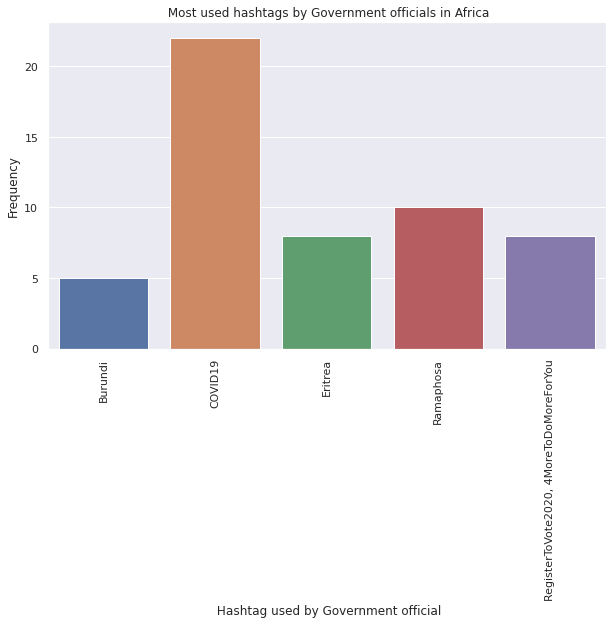

In [ ]:
##Grouping by hashtags.
##Barplot
fig= plt.figure(figsize=(10,6))
sns.barplot(x="hashtags",y="original_author",data=Official_5_hashtags_unique)
plt.xticks(rotation = 90)
plt.xlabel(" Hashtag used by Government official")
plt.ylabel("Frequency")
plt.title(" Most used hashtags by Government officials in Africa")
plt.show()

##Downloading data for Top African Influencers.




In [ ]:
tweetsfile = "Influencer__Africa1.json"
ts = tweetsearch()

for handles in Top_influencers:
    try:
        names = []
        u = api.get_user(user)
        names.append(u.screen_name)
    except Exception:
        pass
dff = ts.get_tweets(handles, csvfile=tweetsfile)



In [ ]:

#Getting the dimension of the influencers dataframe
dff.shape

In [ ]:
##Saving file to csv
dff.to_csv('African Influencers Tweets.csv',index=False)

##Calling the dataframe.
Influencers_data = pd.read_csv('African Influencers Tweets.csv')
Influencers_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 238 non-null    int64  
 1   created_at         238 non-null    object 
 2   source             238 non-null    object 
 3   original_text      238 non-null    object 
 4   clean_text         227 non-null    object 
 5   sentiment          238 non-null    object 
 6   polarity           238 non-null    float64
 7   subjectivity       238 non-null    float64
 8   lang               238 non-null    object 
 9   favorite_count     238 non-null    int64  
 10  retweet_count      238 non-null    int64  
 11  original_author    238 non-null    object 
 12  hashtags           41 non-null     object 
 13  user_mentions      167 non-null    object 
 14  followers          238 non-null    int64  
 15  following          238 non-null    int64  
 16  place_coordinates  9 non-n

In [ ]:
##The structure of the African Influencers data.
Influencers_data.info()

<Figure size 720x360 with 0 Axes>

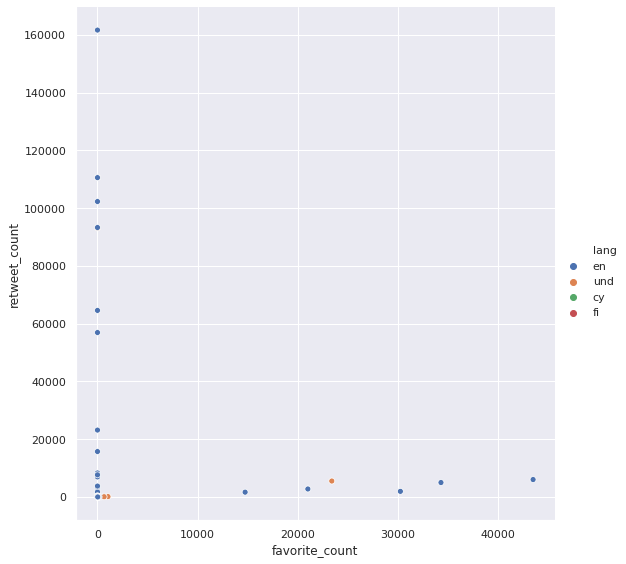

In [ ]:
#Data Visualization
#A scatter plot:
fig= plt.figure(figsize=(10,5))
sns.relplot(x="favorite_count", y="retweet_count", height= 8, aspect=1, hue="lang", data=Influencers_data)
plt.show()

<Figure size 1080x1440 with 0 Axes>

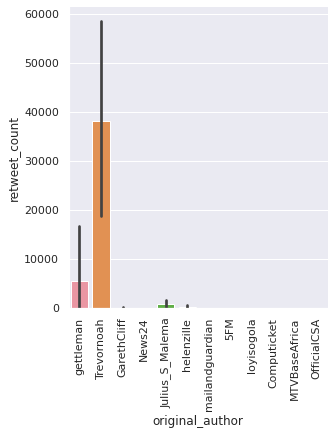

In [ ]:
fig= plt.figure(figsize=(15,20))
sns.catplot(x="original_author", y="retweet_count", kind="bar", data=Influencers_data)
plt.xticks(rotation = 90)
plt.show()

Top African Influencers popularity score:


In [ ]:
###Popularity score
#Parameters of interest = No of retweets, Favorite count.
Popular_score_Influencer = Influencers_data[['original_author','favorite_count','retweet_count']]
Popular_score_Influencer = Popular_score_Influencer.groupby('original_author').sum()

#Creating Popular Score.
Popular_score = Popular_score_Influencer['favorite_count'] + Popular_score_Influencer['retweet_count']
Popular_score_Influencer['Popular_score'] = Popular_score

Popular_score_Influencer=Popular_score_Influencer.sort_values("Popular_score",ascending=False)
Popular_score_Influencer = Popular_score_Influencer.reset_index()
Popular_score_Influencer



,original_author,favorite_count,retweet_count,Popular_score
0,Trevornoah,167344,761381,928725
1,gettleman,127,111157,111284
2,Julius_S_Malema,0,17207,17207
3,helenzille,689,4269,4958
4,OfficialCSA,2708,554,3262
5,MTVBaseAfrica,1100,474,1574
6,GarethCliff,239,1081,1320
7,News24,810,280,1090
8,mailandguardian,80,494,574
9,loyisogola,453,39,492


In [ ]:
#Summary of the Influencer's dataframe
Popular_score_Influencer.describe()

,favorite_count,retweet_count,Popular_score
count,12.000000,12.000000,12.000000
mean,14477.500000,74756.166667,89233.666667
std,48146.388628,218530.512302,266236.367720
min,0.000000,39.000000,64.000000
25%,115.250000,234.500000,553.500000
50%,346.000000,524.000000,1447.000000
75%,882.500000,7503.500000,8020.250000
max,167344.000000,761381.000000,928725.000000


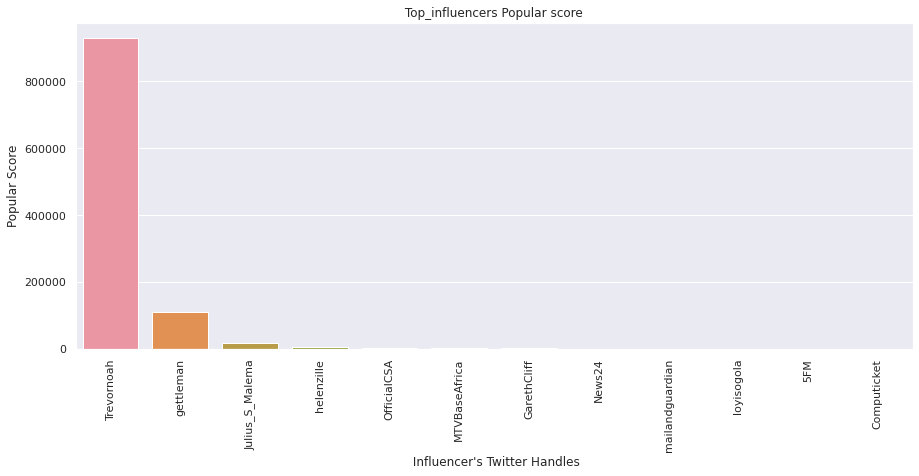

In [ ]:
##Barplot
fig= plt.figure(figsize=(15,6))
sns.barplot(x="original_author",y="Popular_score",data=Popular_score_Influencer)
plt.xticks(rotation = 90)
plt.xlabel(" Influencer's Twitter Handles")
plt.ylabel("Popular Score")
plt.title(" Top_influencers Popular score ")
plt.show()

<Figure size 1080x432 with 0 Axes>

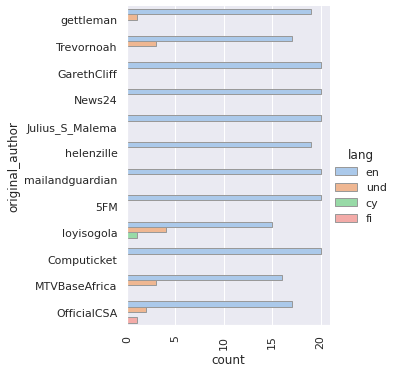

In [ ]:
fig= plt.figure(figsize=(15,6))
sns.catplot(y="original_author", hue="lang", kind="count",
            palette="pastel", edgecolor=".6",
            data=Influencers_data)
plt.xticks(rotation = 90)
plt.show()

Top African Influencers Relevance
 score:

In [ ]:
###Reach score
#Parameters of interest = No of retweets, Favorite count.
Relevance_score_influencers= Influencers_data[['original_author','user_mentions']]

#Checking for missingness.
Relevance_score_influencers.isnull().sum()  #User_mentions has 545 missing values.

Relevance_score_influencers = Relevance_score_influencers.groupby('original_author').count()
Relevance_score_influencers = Relevance_score_influencers.sort_values("user_mentions",ascending=False)
Relevance_score_influencers = Relevance_score_influencers.reset_index()
Relevance_score_influencers


,original_author,user_mentions
0,Julius_S_Malema,20
1,5FM,19
2,helenzille,19
3,GarethCliff,16
4,Computicket,15
5,OfficialCSA,15
6,Trevornoah,15
7,loyisogola,15
8,gettleman,14
9,MTVBaseAfrica,11


In [ ]:
#Summary statistics
Relevance_score_influencers.describe()

,user_mentions
count,12.000000
mean,13.916667
std,5.517877
min,0.000000
25%,13.250000
50%,15.000000
75%,16.750000
max,20.000000


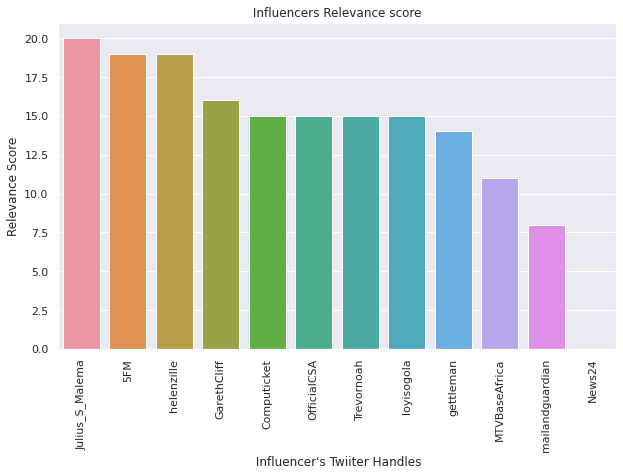

In [ ]:
##Barplot
fig= plt.figure(figsize=(10,6))
sns.barplot(x="original_author",y="user_mentions",data=Relevance_score_influencers)
plt.xticks(rotation = 90)
plt.xlabel(" Influencer's Twiiter Handles")
plt.ylabel("Relevance Score")
plt.title(" Influencers Relevance score ")
plt.show()

Top African Influencers Reach score:

In [ ]:
###Reach score
#Parameters of interest ; No of retweets, Favorite count.
Reach_score_influencers = Influencers_data[['original_author','followers','following']]


Reach_score_influencers = Reach_score_influencers.drop_duplicates('original_author')
#Creating Popular Score.
Reach_score = Reach_score_influencers['followers'] + Reach_score_influencers['following']
Reach_score_influencers['Reach_score'] = Reach_score

Reach_score_influencers = Reach_score_influencers.sort_values("Reach_score",ascending=False)
Reach_score_influencers.reset_index()

#Checking for missingness.
#Reach_score_influencers.isnull().sum()
#len(Reach_score_influencers['followers'].unique())

,index,original_author,followers,following,Reach_score
0,20,Trevornoah,10807639,325,10807964
1,60,News24,3577656,631,3578287
2,80,Julius_S_Malema,3129245,652,3129897
3,40,GarethCliff,1974645,356,1975001
4,100,helenzille,1443362,2303,1445665
5,199,MTVBaseAfrica,1416013,109,1416122
6,139,5FM,1164411,411,1164822
7,218,OfficialCSA,1160197,1998,1162195
8,159,loyisogola,1085247,3947,1089194
9,119,mailandguardian,1060285,478,1060763


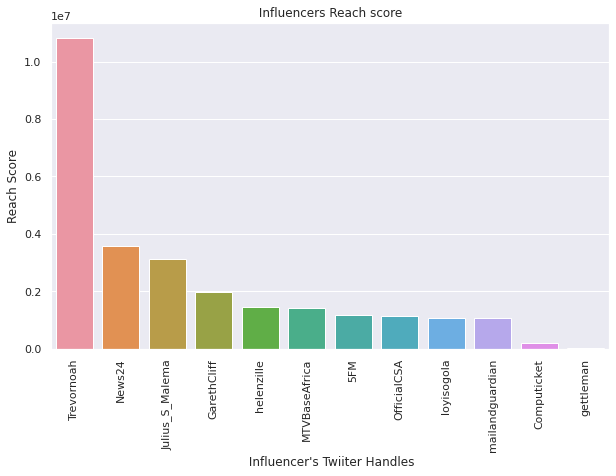

In [ ]:
##Barplot
fig= plt.figure(figsize=(10,6))
sns.barplot(x="original_author",y="Reach_score",data=Reach_score_influencers)
plt.xticks(rotation = 90)
plt.xlabel(" Influencer's Twiiter Handles")
plt.ylabel("Reach Score")
plt.title(" Influencers Reach score ")
plt.show()

Top 5 unique hashtags used by the African Influencers.

In [ ]:
#Dropping the empty entries in the hashtag column. 
Influencers_data.dropna(subset= ["hashtags"], inplace=True)


In [ ]:
Influencers_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 10 to 236
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 41 non-null     int64  
 1   created_at         41 non-null     object 
 2   source             41 non-null     object 
 3   original_text      41 non-null     object 
 4   clean_text         38 non-null     object 
 5   sentiment          41 non-null     object 
 6   polarity           41 non-null     float64
 7   subjectivity       41 non-null     float64
 8   lang               41 non-null     object 
 9   favorite_count     41 non-null     int64  
 10  retweet_count      41 non-null     int64  
 11  original_author    41 non-null     object 
 12  hashtags           41 non-null     object 
 13  user_mentions      30 non-null     object 
 14  followers          41 non-null     int64  
 15  following          41 non-null     int64  
 16  place_coordinates  4 non-n

In [ ]:
Top_hashtags_influencers = Influencers_data[['original_author','created_at','clean_text','lang','retweet_count','hashtags']]
Top_hashtags_influencers = Top_hashtags_influencers.sort_values(['original_author','retweet_count'],ascending=False)

#Saving the data.
#Top_hashtags_influencers.to_csv("Hashtag_influencers.csv",index=False)
#from google.colab import files
#files.download("Hashtag_influencers.csv")

In [ ]:
#Grouping the Top Hashtags used by influencers by their handles 
#Extracting the Top 10 retweets by original author.
Top_hashtags_influencers1 = Top_hashtags_influencers.groupby('original_author').head(10)
Top_hashtags_influencers1 = Top_hashtags_influencers.reset_index(drop=True)
Top_hashtags_influencers1


In [ ]:
##
Top_hashtags_influencers_new =  Top_hashtags_influencers1.groupby('hashtags').count()

##
Top_hashtags_influencers_new =  Top_hashtags_influencers_new.sort_values('retweet_count',ascending=False)
Top_hashtags_influencers_new


,original_author,created_at,clean_text,lang,retweet_count
hashtags,,,,,
COVID19,4,4,4,4,4
SoWhatNow,4,4,4,4,4
5FMTop40,4,4,4,4,4
BlackLivesMatter,3,3,2,3,3
StayHome,2,2,2,2,2
SolidarityCup,2,2,2,2,2
"MandelaDay2020, 67Minutes",2,2,2,2,2
"3TCricket, RainStartsPlay",1,1,1,1,1
MandelaDay,1,1,1,1,1


In [ ]:
#
Top5_hashtag_Influencer = Top_hashtags_influencers_new.index.values[0:5]
Top5_hashtag_Influencer = pd.DataFrame(Top5_hashtag_Influencer)
Top5_hashtag_Influencer.columns = ['Top 5 hashtags'] 
Top5_hashtag_Influencer


,Top 5 hashtags
0,COVID19
1,SoWhatNow
2,5FMTop40
3,BlackLivesMatter
4,StayHome


In [ ]:
influencer_5_hashtags = Influencers_data.loc[((Influencers_data['hashtags'] == 'SoWhatNow')|
                                                    (Influencers_data['hashtags']  == 'StayHome') | 
                                                    (Influencers_data['hashtags'] == 'BlackLivesMatter') |
                                                    (Influencers_data['hashtags'] == 'COVID19')|
                                                    (Influencers_data['hashtags'] == '5FMTop40'))]
influencer_5_hashtags.reset_index(drop=True)

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,followers,following,place_coordinates,place
0,1275984137812230144,Thu Jun 25 02:48:19 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...","RT @IDFCinstitute: @nytimes, @gettleman and @s...",look tragic story New Delhi highlights strain,"Sentiment(polarity=-0.3068181818181818, subjec...",-0.306818,0.602273,en,0,1,gettleman,COVID19,"IDFCinstitute, nytimes, gettleman, suhasiniraj",25704,37,NaN,"New Delhi, India"
1,1283758309762306048,Thu Jul 16 13:40:06 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",RT @CliffCentralCom: If you missed last night'...,If missed last night 's episode amp ...,"Sentiment(polarity=0.0, subjectivity=0.0666666...",0.000000,0.066667,en,0,11,GarethCliff,SoWhatNow,"CliffCentralCom, GarethCliff, tumi_morake, DrE...",1974645,356,NaN,South Africa
2,1283479744076447747,Wed Jul 15 19:13:11 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",Thanks #SoWhatNow https://t.co/bvkg5l0CFL,Thanks,"Sentiment(polarity=0.2, subjectivity=0.2)",0.200000,0.200000,en,67,10,GarethCliff,SoWhatNow,NaN,1974645,356,"[[27.9829939, -26.1362658], [28.1382322, -26.1...",South Africa
3,1283422361048559617,Wed Jul 15 15:25:10 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",RT @eNCA: [TONIGHT] @GarethCliff gets down to ...,TONIGHT gets basics sex sense humour Covid com...,"Sentiment(polarity=-0.3, subjectivity=0.4)",-0.300000,0.400000,en,0,9,GarethCliff,SoWhatNow,"eNCA, GarethCliff, eNCA",1974645,356,NaN,South Africa
4,1283351880903598081,Wed Jul 15 10:45:06 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...","Tonight we’re getting down to basics - sex, se...",Tonight getting basics sex sense humour Covid ...,"Sentiment(polarity=-0.3, subjectivity=0.4)",-0.300000,0.400000,en,44,14,GarethCliff,SoWhatNow,eNCA,1974645,356,"[[27.9483035, -25.9157727], [28.4198285, -25.9...",South Africa
5,1284538807514271747,Sat Jul 18 17:21:31 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",RT @tumisole: I saw this apt summary of #Black...,I saw apt summary Worth retweeting,"Sentiment(polarity=0.44999999999999996, subjec...",0.450000,0.550000,en,0,3059,Julius_S_Malema,BlackLivesMatter,tumisole,3129245,652,NaN,"Johannesburg, South Africa"
6,1284189070206410753,Fri Jul 17 18:11:48 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",RT @ali_naka: It’s a tragedy! No dignity in de...,Its tragedy No dignity death,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,0,357,Julius_S_Malema,COVID19,ali_naka,3129245,652,NaN,"Johannesburg, South Africa"
7,1284572386021580800,Sat Jul 18 19:34:57 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...","As of July 18, the total number of confirmed #...",As July total number confirmed cases South Afr...,"Sentiment(polarity=0.13333333333333333, subjec...",0.133333,0.833333,en,2,7,mailandguardian,COVID19,NaN,1060285,478,NaN,"Johannesburg, South Africa"
8,1284571527145500678,Sat Jul 18 19:31:32 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...","RT @DrZweliMkhize: As of today, the total numb...",As today total number confirmed cases total nu...,"Sentiment(polarity=0.1, subjectivity=0.8125)",0.100000,0.812500,en,0,369,mailandguardian,COVID19,DrZweliMkhize,1060285,478,NaN,"Johannesburg, South Africa"
9,1284457893182402560,Sat Jul 18 12:00:00 +0000 2020,"<a href=""https://about.twitter.com/products/tw...",Your #1 once again on the #5FMTop40 with @msiz...,Your Stuck With You x,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,6,1,5FM,5FMTop40,"msizijames, ArianaGrande, justinbieber",1164411,411,NaN,South Africa


In [ ]:
influencer_5_hashtags_unique = influencer_5_hashtags.groupby("hashtags").count()
influencer_5_hashtags_unique = influencer_5_hashtags_unique.reset_index()
influencer_5_hashtags_unique

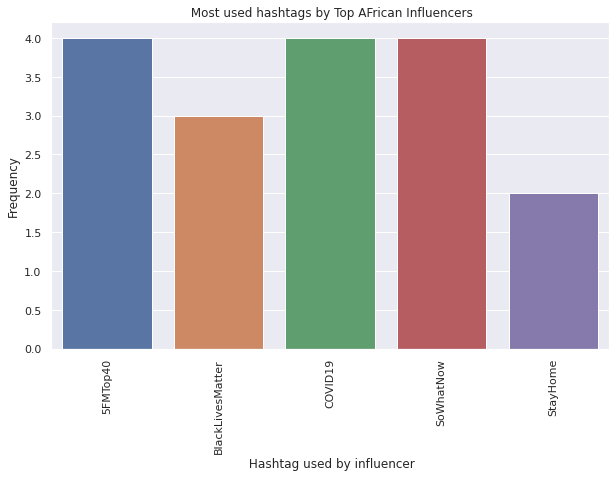

In [ ]:
##Barplot
fig= plt.figure(figsize=(10,6))
sns.barplot(x="hashtags",y="original_author",data=influencer_5_hashtags_unique)
plt.xticks(rotation = 90)
plt.xlabel(" Hashtag used by influencer")
plt.ylabel("Frequency")
plt.title(" Most used hashtags by Top AFrican Influencers")
plt.show()

#Joining the two dataframes with the top 5 unique Hashtags

In [ ]:
Combined_df = pd.concat((Officials_data,Influencers_data),axis=0)
Combined_df

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,followers,following,place_coordinates,place
0,1284562631865532418,Sat Jul 18 18:56:12 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",Ministerial Statement: Minister of Health Lizz...,Ministerial Statement Minister Health Lizzie N...,"Sentiment(polarity=0.06818181818181818, subjec...",0.068182,0.602273,en,69,31,EswatiniGovern1,COVID19,NaN,11321,82,NaN,Eswatini
1,1284166125312454656,Fri Jul 17 16:40:37 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",Ministerial Statement: Minister of Health Lizz...,Ministerial Statement Minister Health Lizzie N...,"Sentiment(polarity=0.06818181818181818, subjec...",0.068182,0.602273,en,44,16,EswatiniGovern1,COVID19,NaN,11321,82,NaN,Eswatini
2,1283799918939975680,Thu Jul 16 16:25:27 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",Minister of Health Lizzie Nkosi announces one ...,Minister Health Lizzie Nkosi announces one new...,"Sentiment(polarity=0.06818181818181818, subjec...",0.068182,0.602273,en,54,24,EswatiniGovern1,"COVID19, COVID19",NaN,11321,82,NaN,Eswatini
3,1283444273149620224,Wed Jul 15 16:52:14 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",Ministerial Statement: Minister of Health Lizz...,Ministerial Statement Minister Health Lizzie N...,"Sentiment(polarity=0.06818181818181818, subjec...",0.068182,0.602273,en,28,13,EswatiniGovern1,COVID19,NaN,11321,82,NaN,Eswatini
5,1283332518964600839,Wed Jul 15 09:28:10 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Ambassador Aragones: “This assistance is part ...,Ambassador Aragones This assistance part bigge...,"Sentiment(polarity=0.0, subjectivity=0.5)",0.000000,0.500000,en,13,2,EswatiniGovern1,COVID19,NaN,11321,82,NaN,Eswatini
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,1284490347591213057,Sat Jul 18 14:08:58 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...",✊🏾✊🏽✊🏿\n\n#BlackLivesMatter https://t.co/1iS9g...,NaN,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,und,1050,121,OfficialCSA,BlackLivesMatter,NaN,1160197,1998,NaN,NaN
230,1284482809395056642,Sat Jul 18 13:39:00 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Together we stand in solidarity for equality @...,Together stand solidarity equality,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,611,85,OfficialCSA,BlackLivesMatter,andileluck19,1160197,1998,NaN,NaN
231,1284481293762396167,Sat Jul 18 13:32:59 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...",🏆🙌🏏\n\n#SolidarityCup #3TCricket #RainStartsPl...,NaN,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,und,663,77,OfficialCSA,"SolidarityCup, 3TCricket, RainStartsPlay",NaN,1160197,1998,NaN,NaN
232,1284471252288188418,Sat Jul 18 12:53:05 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...",And it's the @TAKEALOT Eagles who win the firs...,And 's Eagles win first-ever Eagles Kites,"Sentiment(polarity=0.8, subjectivity=0.4)",0.800000,0.400000,en,164,31,OfficialCSA,SolidarityCup,"TAKEALOT, TAKEALOT, mrdfood",1160197,1998,NaN,NaN


In [ ]:
Combined_df.info()

In [ ]:
##Sorting the values by original author and retweet_count
Top_hashtags_Combined = Combined_df.sort_values(['original_author','retweet_count'],ascending=False)
#Extracting the Top 10 retweets by original author.
Top_hashtags_Combined = Top_hashtags_Combined.groupby('original_author').head(10)

Top_hashtags_Combined =  Top_hashtags_Combined.groupby('hashtags').count()
Top_hashtags_Combined = Top_hashtags_Combined.reset_index()


In [ ]:
##
Top_hashtags_Combined =  Top_hashtags_Combined.sort_values('retweet_count',ascending=False)
Top_hashtags_Combined = Top_hashtags_Combined

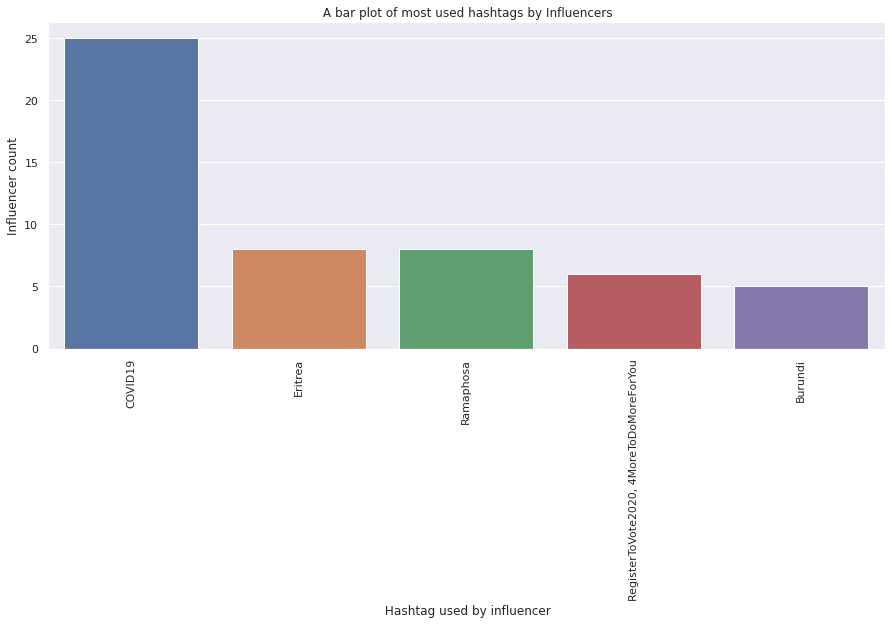

In [ ]:
##Barplot
fig= plt.figure(figsize=(15,6))
sns.barplot(x="hashtags",y="original_author",data=Top_hashtags_Combined)
plt.xticks(rotation = 90)
plt.xlabel(" Hashtag used by influencer")
plt.ylabel("Influencer count")
plt.title(" A bar plot of most used hashtags by Influencers")
plt.show()